In [1]:
# ----------------------------------------------------------------------------
# Title: Assignment 7.2
# Author: Surenther Selvaraj
# Date: 25 Oct 2025
# Modified By: Surenther Selvaraj
# Description: Dimensionality Reduction and Feature Selection
# Data: https://www.kaggle.com/datasets/uciml/mushroom-classification
# ----------------------------------------------------------------------------

In [ ]:
# --- Importing Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# --- Import the data as a data frame and ensure it is loaded correctly. --- #

# Define the file path 
file_path = 'mushrooms.csv'

try:
    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Display the first 5 rows to ensure it is loaded correctly
    print("Data loaded successfully. Here are the first 5 rows:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please download the file from the URL and place it in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully. Here are the first 5 rows:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w   

In [8]:
# --- Convert the categorical features (all of them) to dummy variables. --- #

# 1. Separate features (X) from the target (y)
# X = all columns except 'class' (our features)
# y = only the 'class' column (our target)
X = df.drop('class', axis=1)
y = df['class']

# 2. Convert all categorical features in X to dummy variables
# pd.get_dummies() will automatically convert all object/categorical columns
# 'drop_first=True' drops the first category of each feature to
# prevent statistical redundancy (multicollinearity).
X_dummies = pd.get_dummies(X, drop_first=True)

# 3. Encode the target variable (y) to numbers
# We map 'p' (poisonous) to 1 and 'e' (edible) to 0
y_encoded = y.map({'p': 1, 'e': 0})


# --- Display the results of this step ---

print("--- Dummified Features (X_dummies) Head ---")
print(X_dummies.head())

print("\n--- Encoded Target (y_encoded) Head ---")
print(y_encoded.head())

print(f"\nOriginal number of features: {X.shape[1]}")
print(f"New number of features after dummification: {X_dummies.shape[1]}")


--- Dummified Features (X_dummies) Head ---
   cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        False        False        False        False         True   
1        False        False        False        False         True   
2        False        False        False        False        False   
3        False        False        False        False         True   
4        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  ...  \
0          False           True          False        False        False  ...   
1          False           True          False        False        False  ...   
2          False           True          False        False        False  ...   
3          False          False           True        False        False  ...   
4          False           True          False        False        False  ...   

   population_n  population_s  population_v  pop

In [10]:
# --- Split the data into a training and test set. --- #

# 70% of the data for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X_dummies, 
    y_encoded, 
    test_size=0.30, 
    random_state=42
)

# Display the shapes of the new datasets to confirm the split
print("--- Data Split Complete ---")
print(f"X_train shape (rows, features): {X_train.shape}")
print(f"y_train shape (rows,): {y_train.shape}")
print(f"X_test shape (rows, features): {X_test.shape}")
print(f"y_test shape (rows,): {y_test.shape}")

print(f"\nTotal samples in original dataset: {len(X_dummies)}")
print(f"Total samples in training set:   {len(X_train)}")
print(f"Total samples in testing set:    {len(X_test)}")

--- Data Split Complete ---
X_train shape (rows, features): (5686, 95)
y_train shape (rows,): (5686,)
X_test shape (rows, features): (2438, 95)
y_test shape (rows,): (2438,)

Total samples in original dataset: 8124
Total samples in training set:   5686
Total samples in testing set:    2438


In [ ]:
# --- Fit a decision tree classifier on the training set. --- #

dt_model = DecisionTreeClassifier(random_state=42)

# 2. Fit (train) the model on the training data
dt_model.fit(X_train, y_train)

# 3. Print a confirmation message
print("--- Decision Tree Classifier Training Complete ---")
print("Model has been successfully fitted to the training data.")
print("\nModel Parameters:")
print(dt_model)

--- Decision Tree Classifier Training Complete ---
Model has been successfully fitted to the training data.

Model Parameters:
DecisionTreeClassifier(random_state=42)


--- Model Evaluation ---
Accuracy on Test Set: 1.0000 (or 100.00%)

--- Confusion Matrix ---
[[1257    0]
 [   0 1181]]

Visualizing the Confusion Matrix...


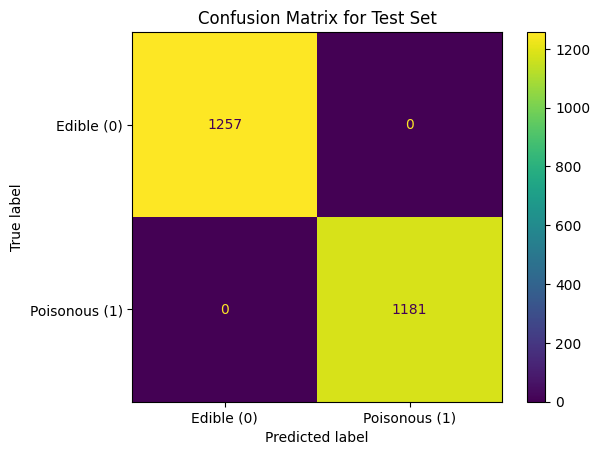

In [16]:
# --- Report the accuracy and create a confusion matrix for the model prediction on the test set. --- #

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Accuracy on Test Set: {accuracy:.4f} (or {accuracy * 100:.2f}%)")

# Create the confusion matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nVisualizing the Confusion Matrix...")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                display_labels=['Edible (0)', 'Poisonous (1)'])
disp.plot()
plt.title("Confusion Matrix for Test Set")
plt.show()

--- Generating Decision Tree Visualization ---


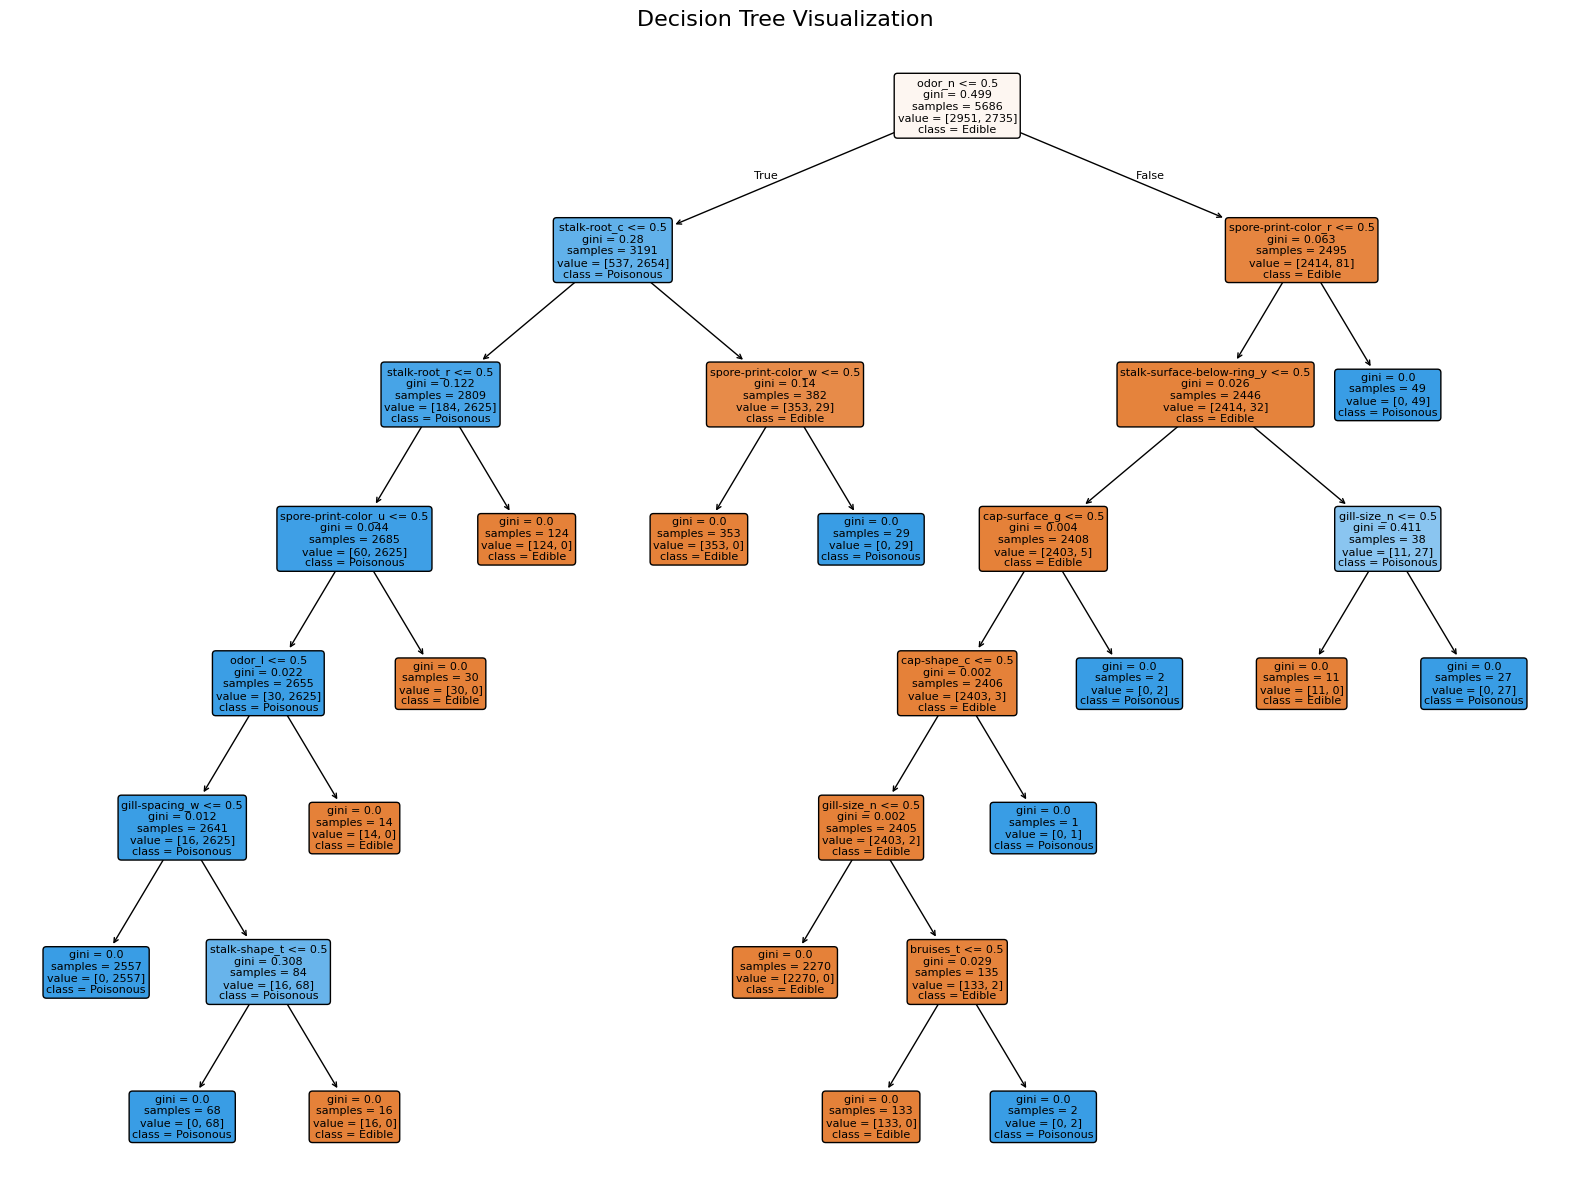

In [19]:
# --- Create a visualization of the decision tree. --- #

print("--- Generating Decision Tree Visualization ---")

# Set the figure size to ensure the tree is readable.
plt.figure(figsize=(20, 15)) 

plot_tree(
    dt_model, 
    feature_names=X_dummies.columns.tolist(), 
    class_names=['Edible', 'Poisonous'],     
    filled=True,                             
    rounded=True,                            
    fontsize=8                               
)

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


In [ ]:
# --- Use a χ2-statistic selector to pick the five best features for this data --- #

# Define the number of features to select
k_best_count = 5

# Initialize the SelectKBest object
chi2_selector = SelectKBest(score_func=chi2, k=k_best_count)

# Fit the selector to the TRAINING data
chi2_selector.fit(X_train, y_train)

# Get the scores and feature names
feature_scores = chi2_selector.scores_

# Get the column names from our original dummified data
feature_names = X_dummies.columns

# Create a DataFrame to view the features and their scores
scores_df = pd.DataFrame({
    'Feature': feature_names,
    'Chi2_Score': feature_scores
})

# Sort by score (highest first) and display the top 5
scores_df = scores_df.sort_values(by='Chi2_Score', ascending=False)

print(f"--- Top {k_best_count} Best Features (based on χ2 score) ---")
print(scores_df.head(k_best_count))

--- Top 5 Best Features (based on χ2 score) ---
                       Feature   Chi2_Score
22                      odor_n  2010.768674
19                      odor_f  1636.806947
45  stalk-surface-above-ring_k  1430.104897
48  stalk-surface-below-ring_k  1352.982930
28                 gill-size_n  1165.836625


In [ ]:
# --- Which five features were selected in step 7? --- #

# Get the boolean mask from the fitted selector
selected_features_mask = chi2_selector.get_support()

# Apply this mask to the feature name columns
top_5_features = X_dummies.columns[selected_features_mask].tolist()

# Print the list of the 5 selected features
print("--- Top 5 Features (using get_support) ---")
print("The five features selected by the χ2-statistic selector are:")
print(top_5_features)

--- Top 5 Features (using get_support) ---
The five features selected by the χ2-statistic selector are:
['odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']



Using the 5 selected features: ['odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']
New X_train shape: (5686, 5)
New X_test shape: (2438, 5)

--- (Step 4 Repeat) Fitting New Decision Tree ---
New model fitted successfully on the 5 best features.

--- (Step 5 Repeat) Evaluating New Model ---
Accuracy on Test Set (5 features): 0.9742 (or 97.42%)

--- Confusion Matrix (5 features) ---
[[1221   36]
 [  27 1154]]

Visualizing the new confusion matrix...


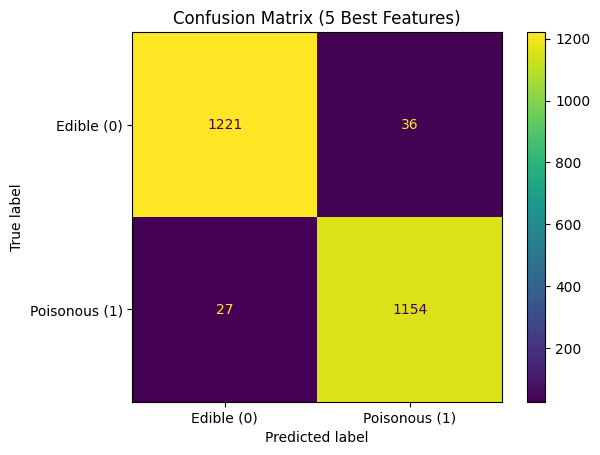

In [ ]:
# --- Repeat steps 4 and 5 with the five best features selected in step 7. --- #

print(f"\nUsing the 5 selected features: {top_5_features}")

# --- Filter the train and test sets ---
X_train_best5 = X_train[top_5_features]
X_test_best5 = X_test[top_5_features]

print(f"New X_train shape: {X_train_best5.shape}")
print(f"New X_test shape: {X_test_best5.shape}")

# --- Fit a new Decision Tree Classifier ---
print("\n--- (Step 4 Repeat) Fitting New Decision Tree ---")

# Create a new instance of the model
dt_model_best5 = DecisionTreeClassifier(random_state=42)

# Fit the new model on the filtered training data
dt_model_best5.fit(X_train_best5, y_train)

print("New model fitted successfully on the 5 best features.")

# --- Report Accuracy and Confusion Matrix ---
print("\n--- (Step 5 Repeat) Evaluating New Model ---")

# Make predictions on the filtered test set
y_pred_best5 = dt_model_best5.predict(X_test_best5)

# Calculate and print accuracy
accuracy_best5 = accuracy_score(y_test, y_pred_best5)
print(f"Accuracy on Test Set (5 features): {accuracy_best5:.4f} (or {accuracy_best5 * 100:.2f}%)")

# Calculate and print the confusion matrix
print("\n--- Confusion Matrix (5 features) ---")
cm_best5 = confusion_matrix(y_test, y_pred_best5)
print(cm_best5)

# Display the confusion matrix visually
print("\nVisualizing the new confusion matrix...")
disp_best5 = ConfusionMatrixDisplay(confusion_matrix=cm_best5, 
                                    display_labels=['Edible (0)', 'Poisonous (1)'])

fig, ax = plt.subplots() 
disp_best5.plot(ax=ax)
ax.set_title("Confusion Matrix (5 Best Features)")
plt.show() # Display the plot

#### Conclusion

The initial model using all 95 features demonstrated that the dataset, in its dummified form, is perfectly separable by a decision tree on this specific train-test split. The 100% accuracy suggests the features contain very clear signals for distinguishing edible from poisonous mushrooms.

The feature selection step successfully identified the 5 most statistically relevant features according to the Chi-squared test, highlighting characteristics like odor, stalk surface, and gill size as key indicators. Training a model with only these 5 features resulted in a much simpler model that still performed remarkably well (97.42% accuracy). This indicates that while perfect classification required all features, the vast majority of the predictive information is concentrated in just those top 5, making dimensionality reduction a viable strategy with only a minor performance trade-off for this dataset and model type. The slight drop in accuracy and the presence of false negatives (predicting poisonous as edible) highlight the small risk introduced by removing features, which might be critical in a real-world scenario like mushroom identification.